In [1817]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasist.structdata import detect_outliers
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [1818]:
data = pd.read_csv("googleplaystore.csv")

In [1819]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [1820]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [1821]:
data.shape

(10841, 13)

In [1822]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Preprocessing

## Explore Missing Values

In [1823]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [1824]:
data.duplicated().sum()

np.int64(483)

In [1825]:
data = data.drop_duplicates()

In [1826]:
columns_dropna = ['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']
data.dropna(subset=columns_dropna, inplace=True)

In [1827]:
data.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

## Explore Category Data

In [1828]:
category = [data.columns[col] for col in range(len(data.columns)) if data.dtypes[col] == "O"]
category

['App',
 'Category',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver']

### Handling Category

App Column

In [1829]:
data['App'].value_counts()

App
ROBLOX                              9
8 Ball Pool                         7
Bubble Shooter                      6
Helix Jump                          6
Zombie Catchers                     6
                                   ..
FR Calculator                       1
Sya9a Maroc - FR                    1
Fr. Mike Schmitz Audio Teachings    1
The SCP Foundation DB fr nn5n       1
Art Drawing Ideas                   1
Name: count, Length: 8190, dtype: int64

In [1830]:
data['App'].nunique()

8190

Category Column

In [1831]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [1832]:
data['Category'].value_counts()

Category
FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: count, dtype: int64

In [1833]:
data = data.loc[data['Category'] != '1.9']

In [1834]:
data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [1835]:
data['Category'].nunique()

33

Reviews Column

In [1836]:
data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

Size Column

In [1837]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

In [1838]:
data = data[data['Size'] != 'Varies with device']

In [1839]:
def convert_unit(value):
    unit = value.strip()[-1]
    size = value.strip()[:-1]
    if unit == 'K':
        return float(size) * 1000
    elif unit == 'M':
        return float(size) * 1000 * 1000
    

data['Size'] = data['Size'].apply(convert_unit)

Installs Column

In [1840]:
data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [1841]:
data['Installs'] = data['Installs'].apply(lambda x: x.strip()[:-1])

In [1842]:
data['Installs'] = data['Installs'].str.replace(',', '').astype(float)

In [1843]:
data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+03, 5.e+08, 1.e+02, 5.e+02, 1.e+01, 1.e+09,
       5.e+00, 5.e+01, 1.e+00])

Type Column

In [1844]:
data['Type'].unique()


array(['Free', 'Paid'], dtype=object)

Price Column

In [1845]:
data['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [1846]:
data['Price'] = data['Price'].apply(lambda x: x.strip()[1:] if x != '0' else x)

In [1847]:
data['Price'].unique()

array(['0', '4.99', '6.99', '7.99', '3.99', '5.99', '2.99', '1.99',
       '9.99', '0.99', '9.00', '5.49', '10.00', '24.99', '11.99', '79.99',
       '16.99', '14.99', '29.99', '12.99', '3.49', '10.99', '7.49',
       '1.50', '19.99', '15.99', '33.99', '39.99', '2.49', '4.49', '1.70',
       '1.49', '3.88', '399.99', '17.99', '400.00', '3.02', '1.76',
       '4.84', '4.77', '1.61', '1.59', '6.49', '1.29', '299.99', '379.99',
       '37.99', '18.99', '389.99', '8.49', '1.75', '14.00', '2.00',
       '3.08', '2.59', '19.40', '15.46', '8.99', '3.04', '13.99', '4.29',
       '3.28', '4.60', '1.00', '2.90', '1.97', '2.56', '1.20'],
      dtype=object)

Content Rating Column

In [1848]:
data['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

Genres Column

In [1849]:
data['Genres'].nunique() 

112

In [1850]:
data['Genres'].value_counts()

Genres
Tools                       633
Entertainment               428
Education                   404
Action                      318
Medical                     277
                           ... 
Puzzle;Education              1
Role Playing;Brain Games      1
Strategy;Education            1
Racing;Pretend Play           1
Strategy;Creativity           1
Name: count, Length: 112, dtype: int64

<Axes: xlabel='Genres', ylabel='Price'>

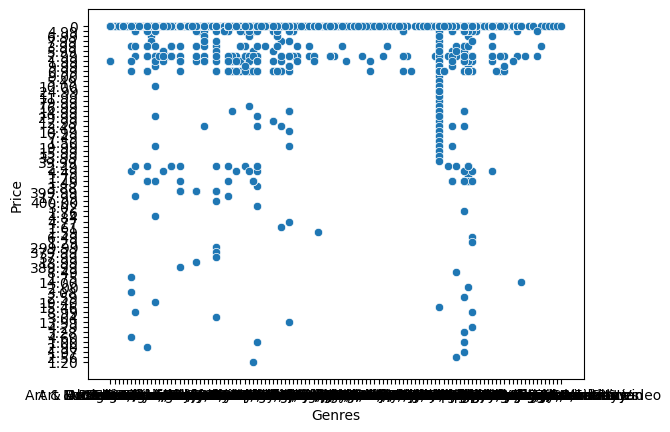

In [1851]:
sns.scatterplot(x=data['Genres'], y=data['Price'])


Last Updated Column

In [1852]:
data['Last Updated'].unique() 

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [1853]:
data['Last Updated'].nunique() 


1278

Current Ver Column

In [1854]:
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.5.447', '1.0.612928', '0.3.4'],
      dtype=object)

Android Ver

In [1855]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.2 and up',
       '5.0 and up', '6.0 and up', '1.6 and up', '2.1 and up',
       '1.5 and up', '7.0 and up', '4.3 and up', '4.0.3 - 7.1.1',
       '2.0 and up', '2.3.3 and up', 'Varies with device', '3.2 and up',
       '4.4W and up', '5.1 and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up'], dtype=object)

In [1856]:

# data['Android Ver'] = data['Android Ver'].drop()
data['Android Ver'] = data['Android Ver'].astype(str).apply(lambda value: value.split()[0][:3])
data['Android Ver'] = data['Android Ver'].replace('Varies with device', pd.NA)
print(data['Android Ver'].unique())


['4.0' '4.2' '4.4' '2.3' '3.0' '4.1' '2.2' '5.0' '6.0' '1.6' '2.1' '1.5'
 '7.0' '4.3' '2.0' 'Var' '3.2' '5.1' '7.1' '8.0' '3.1' '1.0']


### Fix Data Type 

In [1857]:
numeric_columns = ['Reviews', 'Size', 'Installs', 'Price', 'Current Ver', 'Android Ver']
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [1858]:
data = data.dropna(subset=['Android Ver'])


In [1859]:
data['Android Ver'].unique()


array([4. , 4.2, 4.4, 2.3, 3. , 4.1, 2.2, 5. , 6. , 1.6, 2.1, 1.5, 7. ,
       4.3, 2. , 3.2, 5.1, 7.1, 8. , 3.1, 1. ])

In [1860]:
data.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size               255
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver       4664
Android Ver          0
dtype: int64

In [1861]:
data.dropna(subset=['Size'], inplace=True)

## Explore Numeric Data

In [1862]:
numeric = [col for col in data.columns if np.issubdtype(data[col].dtype, np.number)]
numeric

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Current Ver',
 'Android Ver']

### Handling Numeric Data

Rating Column

In [1863]:
data['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 5. , 2.6, 3.1, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

Reviews Column

In [1864]:
data['Reviews'].unique()


array([  159,   967, 87510, ...,  5775,   885,   603])

## Feature Engineer

In [1865]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data['Year'] = data['Last Updated'].dt.year
data['Month'] = data['Last Updated'].dt.month
data['Day'] = data['Last Updated'].dt.day

## Explore Outliers

<Axes: ylabel='Last Updated'>

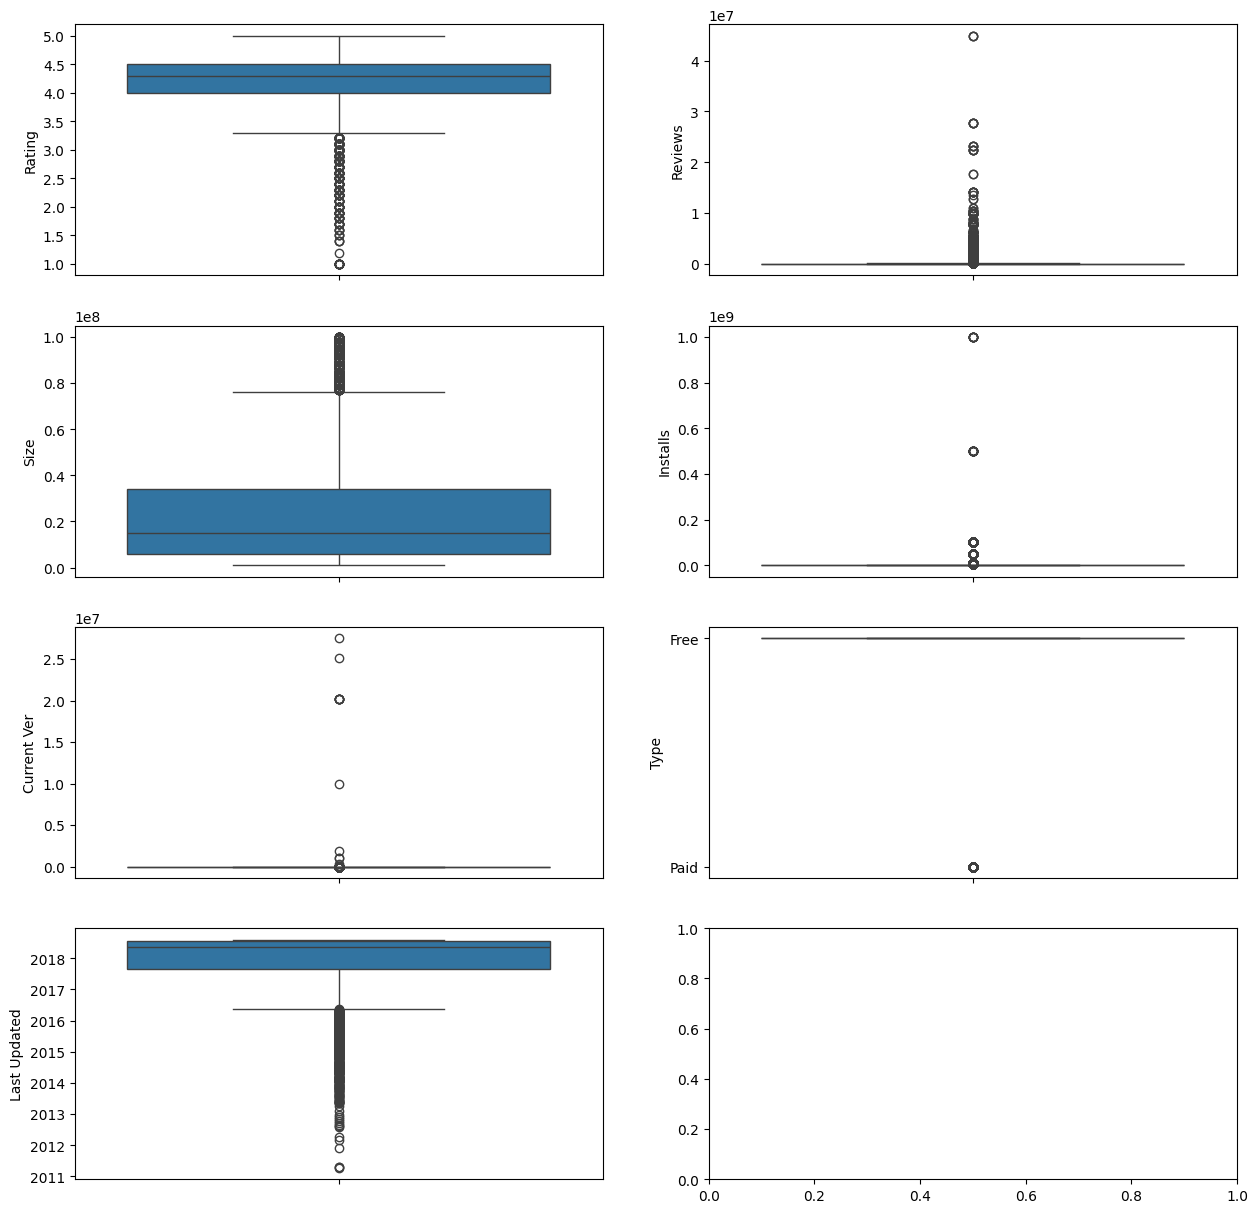

In [1866]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.boxplot(data["Rating"], ax = axes[0][0])
sns.boxplot(data["Reviews"], ax = axes[0][1])
sns.boxplot(data["Size"], ax = axes[1][0])
sns.boxplot(data["Installs"], ax = axes[1][1])
sns.boxplot(data["Current Ver"], ax = axes[2][0])
sns.boxplot(data["Type"], ax = axes[2][1])
sns.boxplot(data["Last Updated"], ax = axes[3][0])
# sns.boxplot(data["EstimatedSalary"], ax = axes[3][1])

## Handling Outliers

In [1867]:
# outlier_columns = ['Rating', 'Installs', 'Size', 'Reviews', 'Current Ver', 'Last Updated']

# outliers_indices = detect_outliers(data, 0, outlier_columns)
# for col in outlier_columns:
#     median_value = data[col].median()
#     data.loc[outliers_indices, col] = median_value
    


In [1868]:
def detect_IQR(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return IQR, lower_bound, upper_bound


In [1869]:
def handling_outliers_median(column):
    lower_bound = detect_IQR(column)[1]
    upper_bound = detect_IQR(column)[2]
    medain_value = data[column].median()
    data[column] = data[column].apply(lambda value : medain_value if (value < lower_bound) or (value > upper_bound) else value)

In [1870]:
def handling_outliers_mean(column):
    lower_bound = detect_IQR(column)[1]
    upper_bound = detect_IQR(column)[2]
    mean_value = data[column].mean()
    data[column] = data[column].apply(lambda value : mean_value if (value < lower_bound) or (value > upper_bound) else value)

In [1871]:
handling_outliers_median('Rating')
handling_outliers_median('Reviews')
handling_outliers_median('Size')
# handling_outliers_median('Installs')
handling_outliers_median('Current Ver')
# handling_outliers_median('Type')
handling_outliers_median('Last Updated')




<Axes: ylabel='Last Updated'>

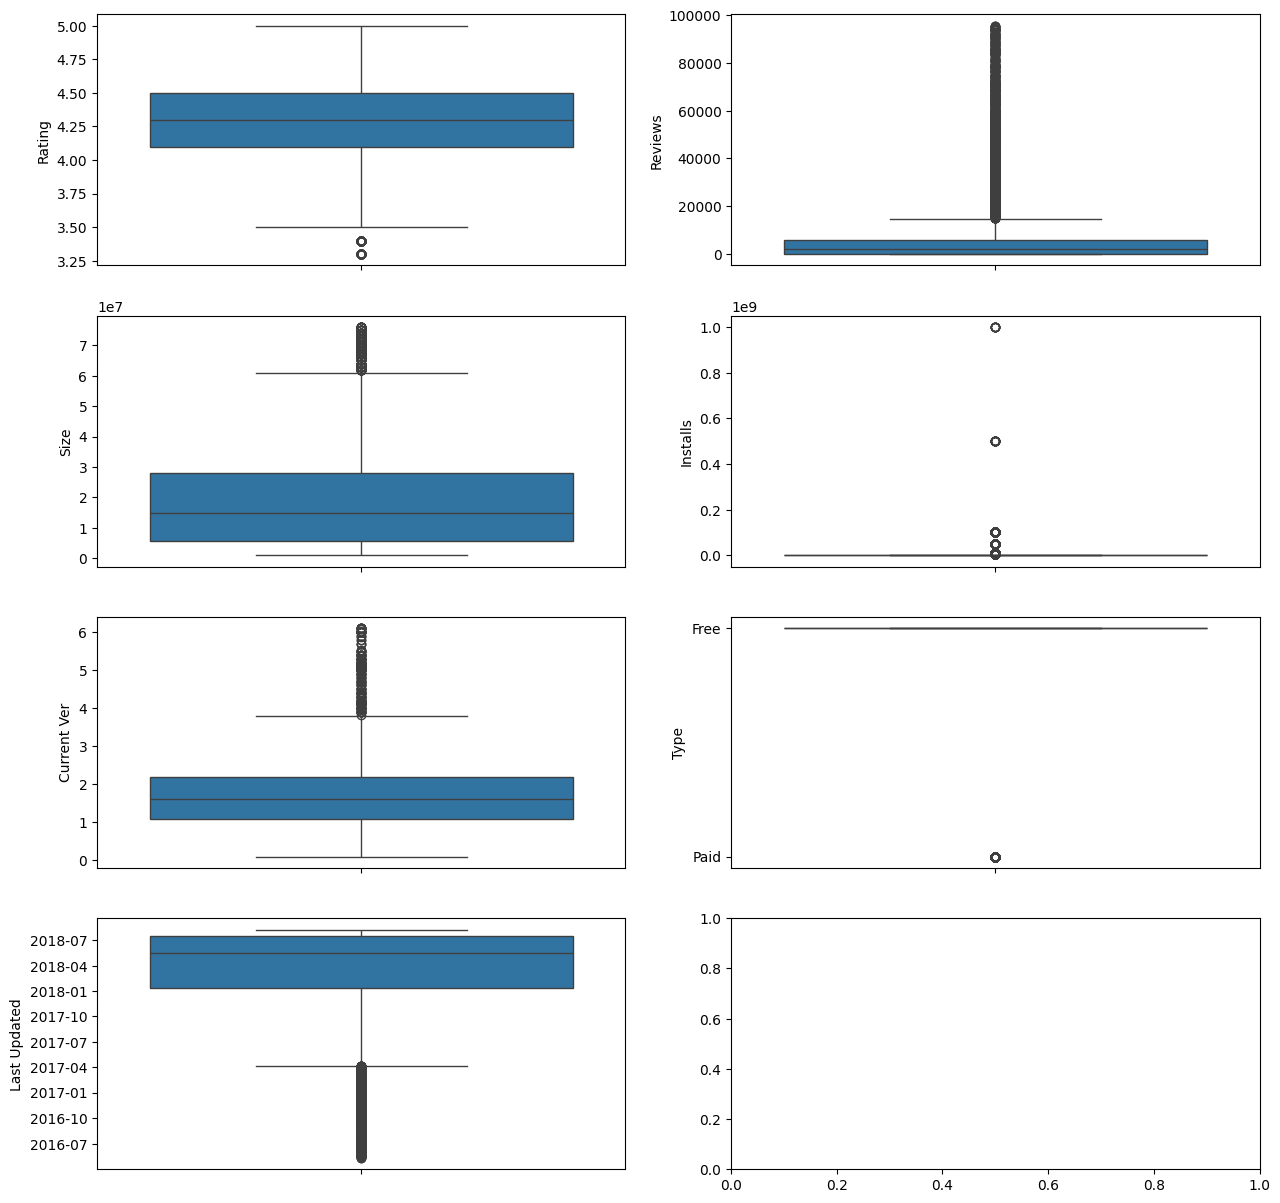

In [1872]:
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
sns.boxplot(data["Rating"], ax = axes[0][0])
sns.boxplot(data["Reviews"], ax = axes[0][1])
sns.boxplot(data["Size"], ax = axes[1][0])
sns.boxplot(data["Installs"], ax = axes[1][1])
sns.boxplot(data["Current Ver"], ax = axes[2][0])
sns.boxplot(data["Type"], ax = axes[2][1])
sns.boxplot(data["Last Updated"], ax = axes[3][0])
# sns.boxplot(data["EstimatedSalary"], ax = axes[3][1])

## Feature Selection

In [1873]:
drob_columns = ['Current Ver', 'Last Updated', 'Category']
data.drop(drob_columns, axis=1, inplace=True)


## Encoding

In [1874]:
encoder_columns = ['App', 'Genres']
data = pd.get_dummies(data, columns=encoder_columns, dtype=int)

In [1875]:
encoder_type = {
    'Free': 0,
    'Paid':1
}

data['Type'] = data['Type'].map(encoder_type)

In [1876]:
encoder_rating = {
    'Everyone': 0,
    'Unrated': 0,
    'Teen': 1,
    'Everyone 10+': 2,
    'Mature 17+': 3,
    'Adults only 18+': 4
}

data['Content Rating'] = data['Content Rating'].map(encoder_rating)

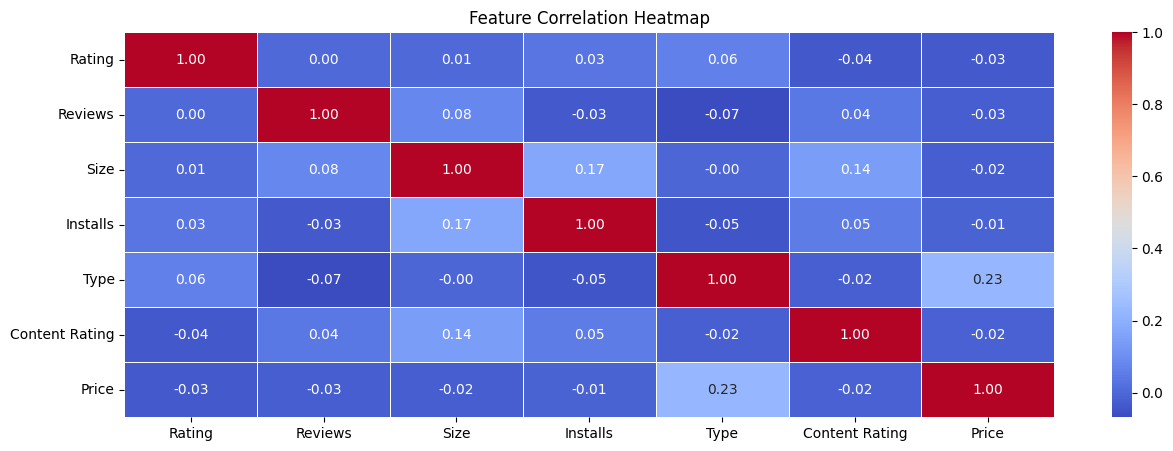

In [1877]:
columns = ['Rating','Reviews', 'Size', 'Installs', 'Type', 'Content Rating', 'Price']
corr_matrix = data[columns].corr()

plt.figure(figsize=(15, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()

## Splitting data into training and testing sets

In [1878]:
input = data.drop(columns=['Price'])
output = data['Price']

In [1879]:
x_train, x_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)

## Robust Scaler

In [1880]:
scaler_columns = ['Rating', 'Reviews', 'Installs', 'Size', 'Content Rating']

In [1881]:
scaler = RobustScaler()
x_train[scaler_columns] = scaler.fit_transform(x_train[scaler_columns])
x_test[scaler_columns] = scaler.transform(x_test[scaler_columns])


In [1882]:
data.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Year', 'Month',
       ...
       'Genres_Strategy;Education', 'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=6846)

In [1883]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7110 entries, 0 to 10837
Columns: 6846 entries, Rating to Genres_Word
dtypes: float64(6), int32(3), int64(6837)
memory usage: 371.3 MB


## Model

In [1884]:
model = LinearRegression()

In [1885]:
model.fit(x_train, y_train)

LinearRegression()

In [1886]:
y_pred = model.predict(x_test)


In [1887]:
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R² Score: {r2_score(y_test, y_pred)}")

MAE: 2.4951898647706803
MSE: 204.5379714313635
R² Score: 0.06164480518705562


In [1888]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Year,Month,...,Genres_Strategy;Education,Genres_Tools,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word
0,4.1,159.0,19000000.0,10000.0,0,0.0,0,4.0,2018,1,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,14000000.0,500000.0,0,0.0,0,4.0,2018,1,...,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8700000.0,5000000.0,0,0.0,0,4.0,2018,8,...,0,0,0,0,0,0,0,0,0,0
3,4.5,2279.0,25000000.0,50000000.0,0,0.0,1,4.2,2018,6,...,0,0,0,0,0,0,0,0,0,0
4,4.3,967.0,2800000.0,100000.0,0,0.0,0,4.4,2018,6,...,0,0,0,0,0,0,0,0,0,0


In [1889]:
app_columns = data.columns[11:2511] 
data['App'] = data[app_columns].apply(lambda row: ', '.join(row.index[row == 1]), axis=1)
data = data.drop(columns=app_columns)

In [1890]:
genre_columns = data.columns[11:-1]
data['Genre'] = data[genre_columns].apply(lambda row: ', '.join(row.index[row == 1]), axis=1)
data = data.drop(columns=genre_columns)

In [1891]:
data.columns

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Android Ver', 'Year', 'Month', 'Day', 'App',
       'Genre'],
      dtype='object')

In [1892]:
decoder_type = {
    0: 'Free',
    1: 'Paid'
}

data['Type'] = data['Type'].map(decoder_type)

In [1893]:
data.head()

,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Android Ver,Year,Month,Day,App,Genre
0,4.1,159.0,19000000.0,10000.0,Free,0.0,0,4.0,2018,1,7,,App_Photo Editor & Candy Camera & Grid & Scrap...
1,3.9,967.0,14000000.0,500000.0,Free,0.0,0,4.0,2018,1,15,App_Coloring book moana,Genres_Art & Design;Pretend Play
2,4.7,87510.0,8700000.0,5000000.0,Free,0.0,0,4.0,2018,8,1,,"App_U Launcher Lite – FREE Live Cool Themes, H..."
3,4.5,2279.0,25000000.0,50000000.0,Free,0.0,1,4.2,2018,6,8,,"App_Sketch - Draw & Paint, Genres_Art & Design"
4,4.3,967.0,2800000.0,100000.0,Free,0.0,0,4.4,2018,6,20,,"App_Pixel Draw - Number Art Coloring Book, Gen..."


In [1894]:
data['Reviews'].unique()

array([  159.,   967., 87510., ...,  5775.,   885.,   603.])

# Analytical Questions

### 1. What is the most expensive app on the Play Store?

In [1895]:
data['Price'].unique().max()

np.float64(400.0)

### 2. Which genre has the highest number of apps?

In [1896]:
data['App'].value_counts().sort_values().tail(1)

App
    4493
Name: count, dtype: int64

### 3. What is the average size of free vs. paid apps?

In [1897]:
data.groupby('Type')['Size'].mean()

Type
Free    1.986994e+07
Paid    1.970486e+07
Name: Size, dtype: float64

### 4. What are the top 5 most expensive apps with a perfect rating (5)?

In [1898]:
((data[data['Rating'] == 5.0])['Price'].sort_values()).tail()

5237     3.99
5246     4.99
7204     4.99
7477    19.99
5489    29.99
Name: Price, dtype: float64

### 5. How many apps have received more than 50K reviews?

In [1899]:
(data[data['Reviews'] >= 50000])['App'].nunique()

107

### 6. What is the average price of apps, grouped by genre and number of installs?

In [1900]:
data.groupby(['Genre', 'Installs'])['Price'].mean().sort_values()

Genre                                               Installs  
Genres_Weather                                      10000000.0      0.00
App_EP Kalkulator el. energije, Genres_Tools        100.0           0.00
App_EP Lab Digest, Genres_Medical                   500.0           0.00
App_EP Mobile, Genres_Medical                       50000.0         0.00
App_EP Research Service, Genres_Books & Reference   1000.0          0.00
                                                                   ...  
App_I am Rich Plus, Genres_Entertainment            10000.0       399.99
App_I am rich (Most expensive app), Genres_Finance  1000.0        399.99
App_💎 I'm rich, Genres_Lifestyle                    10000.0       399.99
App_I am Rich, Genres_Finance                       5000.0        399.99
App_I'm Rich - Trump Edition, Genres_Lifestyle      10000.0       400.00
Name: Price, Length: 4792, dtype: float64

### 7. How many apps have a rating higher than 4.7, and what is their average price?

In [1901]:
# apps have a rating higher than 4.7
(data[data['Rating'] >= 4.7])['App'].nunique()

403

In [1902]:
# average price
(data[data['Rating'] >= 4.7])['Price'].mean()

np.float64(0.4576842105263158)

### 8. What is Google's estimated revenue from apps with 5,000,000+ installs? 

(Assuming Google takes a 30% cut from app sales)

In [1903]:
(data[data['Installs'] == 5.e+06])['Price'].sum()

np.float64(0.0)

### 9. What are the maximum and minimum sizes of free vs. paid apps?

In [1904]:
data.groupby('Type')['Size'].max()

Type
Free    76000000.0
Paid    74000000.0
Name: Size, dtype: float64

In [1905]:
data.groupby('Type')['Size'].min()

Type
Free    1000000.0
Paid    1000000.0
Name: Size, dtype: float64

### 10. Is there a correlation between an app’s rating, number of reviews, size, and its price?

<Axes: >

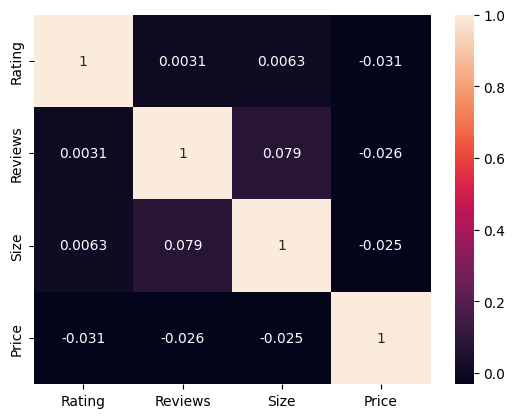

In [1906]:
sns.heatmap(data[['Rating','Reviews','Size', 'Price']].corr(), annot=True)

### 11. How many apps exist for each type (free/paid) across diﬀerent content ratings?

In [1907]:
data.groupby(['Type', 'Rating']).size()

Type  Rating
Free  3.3         86
      3.4        100
      3.5        130
      3.6        134
      3.7        177
      3.8        228
      3.9        288
      4.0        419
      4.1        504
      4.2        630
      4.3       1127
      4.4        708
      4.5        696
      4.6        542
      4.7        363
      4.8        175
      4.9         77
      5.0        232
Paid  3.3          4
      3.4          9
      3.5          8
      3.6          8
      3.7          8
      3.8         17
      3.9         11
      4.0         16
      4.1         25
      4.2         46
      4.3         69
      4.4         56
      4.5         52
      4.6         62
      4.7         43
      4.8         29
      4.9          6
      5.0         25
dtype: int64

### 12. How many apps are compatible with Android version 4.x?

In [1908]:
(data[data['Android Ver'] >= 4.0])['App'].count()

np.int64(5808)